In [2]:
import numpy as np
import pandas as pd
import os

In [3]:
iris = pd.read_csv('/Users/Bryan/Documents/Programming/Python_Courses/Tensorflow2/DATA/iris.csv')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
X = iris.drop('species', axis = 1)
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [6]:
y = iris['species']
y

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

In [9]:
y.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [10]:
# need to code outputs as dummies or one hot encoding

from sklearn.preprocessing import LabelBinarizer

In [11]:
encoder = LabelBinarizer()

In [12]:
y = encoder.fit_transform(y)
y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [13]:
# train test split and scale data

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [16]:
scaler = MinMaxScaler()

In [18]:
# only fit to the training set

scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [19]:
scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [20]:
# create the model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [21]:
import plaidml.keras
plaidml.keras.install_backend()
from keras import backend as K

In [22]:
model = Sequential()

model.add(Dense(units = 4, activation='relu', input_shape=[4,]))
model.add(Dense(units = 3, activation ='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4)                 20        
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 15        
Total params: 35
Trainable params: 35
Non-trainable params: 0
_________________________________________________________________


In [23]:
from tensorflow.keras.callbacks import EarlyStopping

In [24]:
early_stop = EarlyStopping(patience= 10)

In [27]:
model.fit(x=scaled_X_train, y=y_train, epochs=300,
         validation_data=(scaled_X_test, y_test), callbacks=[early_stop])

Epoch 1/300
4/4 [==============================] - 0s 58ms/step - loss: 1.2069 - accuracy: 0.1583 - val_loss: 1.2012 - val_accuracy: 0.1000
Epoch 2/300
4/4 [==============================] - 0s 6ms/step - loss: 1.2014 - accuracy: 0.1583 - val_loss: 1.1961 - val_accuracy: 0.1000
Epoch 3/300
4/4 [==============================] - 0s 6ms/step - loss: 1.1965 - accuracy: 0.1417 - val_loss: 1.1908 - val_accuracy: 0.1000
Epoch 4/300
4/4 [==============================] - 0s 6ms/step - loss: 1.1913 - accuracy: 0.1250 - val_loss: 1.1857 - val_accuracy: 0.1333
Epoch 5/300
4/4 [==============================] - 0s 6ms/step - loss: 1.1863 - accuracy: 0.1000 - val_loss: 1.1807 - val_accuracy: 0.1333
Epoch 6/300
4/4 [==============================] - 0s 6ms/step - loss: 1.1813 - accuracy: 0.0833 - val_loss: 1.1758 - val_accuracy: 0.1000
Epoch 7/300
4/4 [==============================] - 0s 7ms/step - loss: 1.1760 - accuracy: 0.0750 - val_loss: 1.1712 - val_accuracy: 0.1000
Epoch 8/300
4/4 [=========

4/4 [==============================] - 0s 6ms/step - loss: 0.9913 - accuracy: 0.6500 - val_loss: 0.9968 - val_accuracy: 0.5667
Epoch 60/300
4/4 [==============================] - 0s 6ms/step - loss: 0.9887 - accuracy: 0.6500 - val_loss: 0.9945 - val_accuracy: 0.5667
Epoch 61/300
4/4 [==============================] - 0s 6ms/step - loss: 0.9862 - accuracy: 0.6500 - val_loss: 0.9920 - val_accuracy: 0.5667
Epoch 62/300
4/4 [==============================] - 0s 6ms/step - loss: 0.9838 - accuracy: 0.6500 - val_loss: 0.9896 - val_accuracy: 0.5667
Epoch 63/300
4/4 [==============================] - 0s 6ms/step - loss: 0.9812 - accuracy: 0.6500 - val_loss: 0.9872 - val_accuracy: 0.5667
Epoch 64/300
4/4 [==============================] - 0s 6ms/step - loss: 0.9786 - accuracy: 0.6500 - val_loss: 0.9848 - val_accuracy: 0.5667
Epoch 65/300
4/4 [==============================] - 0s 6ms/step - loss: 0.9760 - accuracy: 0.6500 - val_loss: 0.9825 - val_accuracy: 0.5667
Epoch 66/300
4/4 [===============

4/4 [==============================] - 0s 6ms/step - loss: 0.8459 - accuracy: 0.6833 - val_loss: 0.8568 - val_accuracy: 0.6000
Epoch 118/300
4/4 [==============================] - 0s 6ms/step - loss: 0.8435 - accuracy: 0.6833 - val_loss: 0.8546 - val_accuracy: 0.6000
Epoch 119/300
4/4 [==============================] - 0s 6ms/step - loss: 0.8412 - accuracy: 0.6833 - val_loss: 0.8522 - val_accuracy: 0.6000
Epoch 120/300
4/4 [==============================] - 0s 6ms/step - loss: 0.8387 - accuracy: 0.6833 - val_loss: 0.8499 - val_accuracy: 0.6000
Epoch 121/300
4/4 [==============================] - 0s 6ms/step - loss: 0.8363 - accuracy: 0.6833 - val_loss: 0.8476 - val_accuracy: 0.6000
Epoch 122/300
4/4 [==============================] - 0s 6ms/step - loss: 0.8340 - accuracy: 0.6917 - val_loss: 0.8455 - val_accuracy: 0.6000
Epoch 123/300
4/4 [==============================] - 0s 6ms/step - loss: 0.8316 - accuracy: 0.6917 - val_loss: 0.8432 - val_accuracy: 0.6000
Epoch 124/300
4/4 [========

4/4 [==============================] - 0s 6ms/step - loss: 0.6969 - accuracy: 0.8667 - val_loss: 0.7107 - val_accuracy: 0.9000
Epoch 176/300
4/4 [==============================] - 0s 6ms/step - loss: 0.6941 - accuracy: 0.8833 - val_loss: 0.7081 - val_accuracy: 0.9000
Epoch 177/300
4/4 [==============================] - 0s 6ms/step - loss: 0.6915 - accuracy: 0.8833 - val_loss: 0.7056 - val_accuracy: 0.9000
Epoch 178/300
4/4 [==============================] - 0s 6ms/step - loss: 0.6889 - accuracy: 0.8833 - val_loss: 0.7031 - val_accuracy: 0.8667
Epoch 179/300
4/4 [==============================] - 0s 6ms/step - loss: 0.6863 - accuracy: 0.8917 - val_loss: 0.7007 - val_accuracy: 0.9000
Epoch 180/300
4/4 [==============================] - 0s 6ms/step - loss: 0.6838 - accuracy: 0.9000 - val_loss: 0.6982 - val_accuracy: 0.9000
Epoch 181/300
4/4 [==============================] - 0s 6ms/step - loss: 0.6813 - accuracy: 0.9000 - val_loss: 0.6957 - val_accuracy: 0.8667
Epoch 182/300
4/4 [========

4/4 [==============================] - 0s 6ms/step - loss: 0.5735 - accuracy: 0.9750 - val_loss: 0.5914 - val_accuracy: 0.9333
Epoch 234/300
4/4 [==============================] - 0s 6ms/step - loss: 0.5719 - accuracy: 0.9750 - val_loss: 0.5897 - val_accuracy: 0.9333
Epoch 235/300
4/4 [==============================] - 0s 6ms/step - loss: 0.5703 - accuracy: 0.9750 - val_loss: 0.5881 - val_accuracy: 0.9333
Epoch 236/300
4/4 [==============================] - 0s 6ms/step - loss: 0.5686 - accuracy: 0.9750 - val_loss: 0.5865 - val_accuracy: 0.9333
Epoch 237/300
4/4 [==============================] - 0s 6ms/step - loss: 0.5669 - accuracy: 0.9750 - val_loss: 0.5849 - val_accuracy: 0.9333
Epoch 238/300
4/4 [==============================] - 0s 6ms/step - loss: 0.5654 - accuracy: 0.9750 - val_loss: 0.5833 - val_accuracy: 0.9333
Epoch 239/300
4/4 [==============================] - 0s 6ms/step - loss: 0.5639 - accuracy: 0.9750 - val_loss: 0.5817 - val_accuracy: 0.9333
Epoch 240/300
4/4 [========

4/4 [==============================] - 0s 6ms/step - loss: 0.4916 - accuracy: 0.9750 - val_loss: 0.5096 - val_accuracy: 0.9333
Epoch 292/300
4/4 [==============================] - 0s 6ms/step - loss: 0.4905 - accuracy: 0.9750 - val_loss: 0.5083 - val_accuracy: 0.9333
Epoch 293/300
4/4 [==============================] - 0s 6ms/step - loss: 0.4893 - accuracy: 0.9750 - val_loss: 0.5071 - val_accuracy: 0.9333
Epoch 294/300
4/4 [==============================] - 0s 6ms/step - loss: 0.4882 - accuracy: 0.9750 - val_loss: 0.5059 - val_accuracy: 0.9333
Epoch 295/300
4/4 [==============================] - 0s 6ms/step - loss: 0.4870 - accuracy: 0.9750 - val_loss: 0.5047 - val_accuracy: 0.9333
Epoch 296/300
4/4 [==============================] - 0s 6ms/step - loss: 0.4857 - accuracy: 0.9750 - val_loss: 0.5035 - val_accuracy: 0.9333
Epoch 297/300
4/4 [==============================] - 0s 6ms/step - loss: 0.4845 - accuracy: 0.9750 - val_loss: 0.5023 - val_accuracy: 0.9333
Epoch 298/300
4/4 [========

In [28]:
metrics = pd.DataFrame(model.history.history)
metrics

,loss,accuracy,val_loss,val_accuracy
0,1.206895,0.158333,1.201239,0.100000
1,1.201425,0.158333,1.196088,0.100000
2,1.196538,0.141667,1.190775,0.100000
3,1.191278,0.125000,1.185684,0.133333
4,1.186343,0.100000,1.180701,0.133333
...,...,...,...,...
295,0.485713,0.975000,0.503514,0.933333
296,0.484531,0.975000,0.502282,0.933333
297,0.483386,0.975000,0.501117,0.933333
298,0.482305,0.975000,0.499989,0.933333


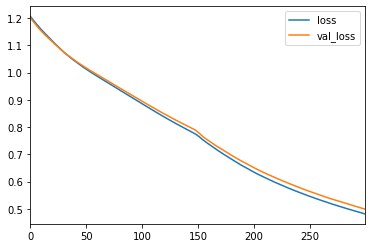

In [30]:
metrics[['loss', 'val_loss']].plot()

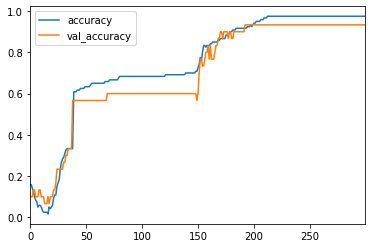

In [31]:
metrics[['accuracy', 'val_accuracy']].plot()

In [32]:
model.evaluate(scaled_X_test, y_test, verbose=0)

[0.4987982511520386, 0.9333333373069763]

In [33]:
# make best model possible with all data

In [34]:
epochs = len(metrics)
epochs

300

In [35]:
scaled_X = scaler.fit_transform(X)

In [36]:
model = Sequential()

model.add(Dense(units = 4, activation='relu', input_shape=[4,]))
model.add(Dense(units = 3, activation ='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 15        
Total params: 35
Trainable params: 35
Non-trainable params: 0
_________________________________________________________________


In [37]:
model.fit(scaled_X, y, epochs=epochs)

Epoch 1/300
5/5 [==============================] - 0s 1ms/step - loss: 1.0960 - accuracy: 0.3933
Epoch 2/300
5/5 [==============================] - 0s 1ms/step - loss: 1.0939 - accuracy: 0.4000
Epoch 3/300
5/5 [==============================] - 0s 1ms/step - loss: 1.0920 - accuracy: 0.4000
Epoch 4/300
5/5 [==============================] - 0s 1ms/step - loss: 1.0903 - accuracy: 0.4133
Epoch 5/300
5/5 [==============================] - 0s 1ms/step - loss: 1.0884 - accuracy: 0.4600
Epoch 6/300
5/5 [==============================] - 0s 1ms/step - loss: 1.0862 - accuracy: 0.5133
Epoch 7/300
5/5 [==============================] - 0s 1ms/step - loss: 1.0843 - accuracy: 0.5533
Epoch 8/300
5/5 [==============================] - 0s 1ms/step - loss: 1.0822 - accuracy: 0.5867
Epoch 9/300
5/5 [==============================] - 0s 1ms/step - loss: 1.0801 - accuracy: 0.6133
Epoch 10/300
5/5 [==============================] - 0s 1ms/step - loss: 1.0778 - accuracy: 0.6333
Epoch 11/300
5/5 [===========

5/5 [==============================] - 0s 1ms/step - loss: 0.6920 - accuracy: 0.7000
Epoch 85/300
5/5 [==============================] - 0s 1ms/step - loss: 0.6877 - accuracy: 0.7000
Epoch 86/300
5/5 [==============================] - 0s 1ms/step - loss: 0.6834 - accuracy: 0.7000
Epoch 87/300
5/5 [==============================] - 0s 1ms/step - loss: 0.6791 - accuracy: 0.7000
Epoch 88/300
5/5 [==============================] - 0s 1ms/step - loss: 0.6747 - accuracy: 0.7000
Epoch 89/300
5/5 [==============================] - 0s 1ms/step - loss: 0.6705 - accuracy: 0.7000
Epoch 90/300
5/5 [==============================] - 0s 1ms/step - loss: 0.6666 - accuracy: 0.7000
Epoch 91/300
5/5 [==============================] - 0s 1ms/step - loss: 0.6623 - accuracy: 0.7000
Epoch 92/300
5/5 [==============================] - 0s 1ms/step - loss: 0.6583 - accuracy: 0.7000
Epoch 93/300
5/5 [==============================] - 0s 1ms/step - loss: 0.6543 - accuracy: 0.7000
Epoch 94/300
5/5 [===============

5/5 [==============================] - 0s 1ms/step - loss: 0.4810 - accuracy: 0.7733
Epoch 168/300
5/5 [==============================] - 0s 1ms/step - loss: 0.4797 - accuracy: 0.7733
Epoch 169/300
5/5 [==============================] - 0s 1ms/step - loss: 0.4783 - accuracy: 0.7733
Epoch 170/300
5/5 [==============================] - 0s 1ms/step - loss: 0.4769 - accuracy: 0.7800
Epoch 171/300
5/5 [==============================] - 0s 1ms/step - loss: 0.4756 - accuracy: 0.7867
Epoch 172/300
5/5 [==============================] - 0s 1ms/step - loss: 0.4742 - accuracy: 0.7867
Epoch 173/300
5/5 [==============================] - 0s 1ms/step - loss: 0.4730 - accuracy: 0.7867
Epoch 174/300
5/5 [==============================] - 0s 1ms/step - loss: 0.4716 - accuracy: 0.7867
Epoch 175/300
5/5 [==============================] - 0s 1ms/step - loss: 0.4702 - accuracy: 0.7867
Epoch 176/300
5/5 [==============================] - 0s 1ms/step - loss: 0.4690 - accuracy: 0.7867
Epoch 177/300
5/5 [=====

5/5 [==============================] - 0s 1ms/step - loss: 0.3786 - accuracy: 0.9467
Epoch 250/300
5/5 [==============================] - 0s 1ms/step - loss: 0.3775 - accuracy: 0.9467
Epoch 251/300
5/5 [==============================] - 0s 1ms/step - loss: 0.3763 - accuracy: 0.9467
Epoch 252/300
5/5 [==============================] - 0s 1ms/step - loss: 0.3751 - accuracy: 0.9467
Epoch 253/300
5/5 [==============================] - 0s 1ms/step - loss: 0.3739 - accuracy: 0.9467
Epoch 254/300
5/5 [==============================] - 0s 1ms/step - loss: 0.3727 - accuracy: 0.9467
Epoch 255/300
5/5 [==============================] - 0s 1ms/step - loss: 0.3717 - accuracy: 0.9467
Epoch 256/300
5/5 [==============================] - 0s 1ms/step - loss: 0.3704 - accuracy: 0.9467
Epoch 257/300
5/5 [==============================] - 0s 1ms/step - loss: 0.3693 - accuracy: 0.9467
Epoch 258/300
5/5 [==============================] - 0s 1ms/step - loss: 0.3681 - accuracy: 0.9467
Epoch 259/300
5/5 [=====

In [38]:
pwd

'/Users/Bryan/Documents/Programming/Python_Courses/Tensorflow2'

In [39]:
model.save("final_iris_model.h5")

In [40]:
import joblib

In [41]:
joblib.dump(scaler, 'iris_scaler.pkl')

['iris_scaler.pkl']

In [42]:
from tensorflow.keras.models import load_model

In [43]:
flower_model = load_model('final_iris_model.h5')

In [53]:
flower_scaler = joblib.load('iris_scaler.pkl')

## Predict Single Flower

In [45]:
iris.head(1)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa


In [47]:
flower_example = {'sepal_length':5.1,
                 'sepal_width':3.5,
                 'petal_length':1.4,
                 'petal_width':0}

In [48]:
flower_example.keys()

dict_keys(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])

In [49]:
# get the classes from the encoder
# index locations 0, 1, 2

encoder.classes_

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [59]:
def return_prediction(model, scaler, sample_json):
    
    s_len = sample_json["sepal_length"]
    s_wid = sample_json["sepal_width"]
    p_len = sample_json["petal_length"]
    p_wid = sample_json["petal_width"]
    
    flower = [[s_len, s_wid, p_len, p_wid]]
    
    classes = np.array(['setosa', 'versicolor', 'virginica'])
    
    flower = scaler.transform(flower)
    
    # get the returned index
    class_index = model.predict_classes(flower)[0]
    
    # return the class
    return classes[class_index]
    

In [60]:
return_prediction(flower_model, flower_scaler, flower_example)

'setosa'

# Set up code for deployment

In [ ]:
from tensorflow.keras.models import load_model
import joblib
import numpy as np

flower_model = load_model('final_iris_model.h5')
flower_scaler = joblib.load('iris_scaler.pkl')


def return_prediction(model, scaler, sample_json):
    
    s_len = sample_json["sepal_length"]
    s_wid = sample_json["sepal_width"]
    p_len = sample_json["petal_length"]
    p_wid = sample_json["petal_width"]
    
    flower = [[s_len, s_wid, p_len, p_wid]]
    
    classes = np.array(['setosa', 'versicolor', 'virginica'])
    
    flower = scaler.transform(flower)
    
    # get the returned index
    class_index = model.predict_classes(flower)[0]
    
    # return the class
    return classes[class_index]

